**Regression**

**Lorenz Dataset**

In [22]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNTU/HW3/regression/Lorenz Dataset.xlsx")
data_L = df.to_numpy()

**Preparing Dataset**

In [25]:
data = data_L
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display, clear_output

def createTimeSeries(data):
    tw = 8  #window
    l = data.shape[0] - tw -1
    time_series_array = np.zeros((l, tw-2))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
      for j in range(6):
        if j!=5:
          time_series_array[i, j] = data[i+j]
        elif j==5:
           time_series_array[i, j] = data[i+j+2]
    return  time_series_array


data = createTimeSeries(data)
# normalize the input features
def normalizeData(data):
  for ii in range(6):
      data[:, ii] = (data[:, ii] - np.min(data[:, ii]))/(np.max(data[:, ii]) - np.min(data[:, ii]))
  return data
data = normalizeData(data)

C:\Users\ISD\AppData\Local\Temp\ipykernel_15672\3944888030.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j]
C:\Users\ISD\AppData\Local\Temp\ipykernel_15672\3944888030.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j+2]


**Initialize Elman-Jordan Rough**

In [49]:
num_data      =  data.shape[0]
percent_train =  0.7
num_train     =  round(num_data * percent_train)
num_test      =  num_data - num_train
n0, n1, n2    =  5, 5, 1
eta           = 0.004
eta2          = 0.001
epoch         =  200

mse_train = np.zeros(epoch)
mse_test  = np.zeros(epoch)

a, c, b = -1,0,1


#layer 1 information
np.random.seed(42)
wxu  = np.random.uniform(c, b, (n1,n0))
wxl  = np.random.uniform(a, c, (n1,n0))

wc1u = np.random.uniform(c, b, (n1,n1))
wc1l = np.random.uniform(a, c, (n1,n1))

wc2u = np.random.uniform(c, b, (n2,n1))
wc2l = np.random.uniform(a, c, (n2,n1))

net1up = net1u = np.zeros(n1)
net1lp = net1l = np.zeros(n1)

o1u = np.zeros(n1)
o1l = np.zeros(n1)
o1pp = o1p = o1= np.zeros(n1)


#layer 2 information
wyup  = wyu = np.random.uniform(c, b, (n2, n1))
wylp  = wyl = np.random.uniform(a, c, (n2, n1))
net2u = np.zeros(n2)
net2l = np.zeros(n2)
o2u   = np.zeros(n2)
o2l   = np.zeros(n2)
o2pp  = o2p = o2= np.zeros(n2)

def sigmoid(x):
    return (1-np.exp(-x))/(1+np.exp(-x))

def dfsigmoid(x):
    return 2*np.exp(-x)/(1+np.exp(-x))**2
    

In [51]:
net1u

array([0., 0., 0., 0., 0.])

**Impelemention Elman-Joradn Rough**

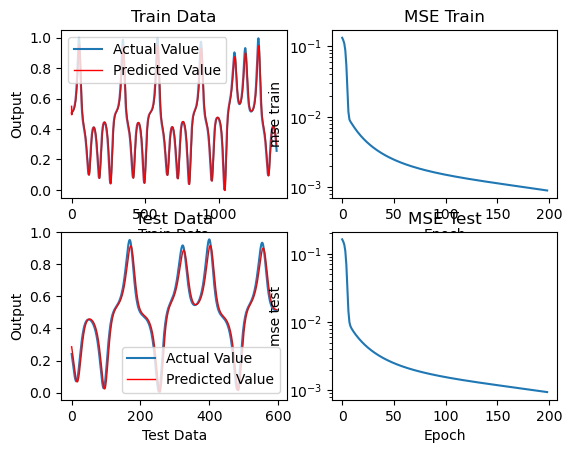

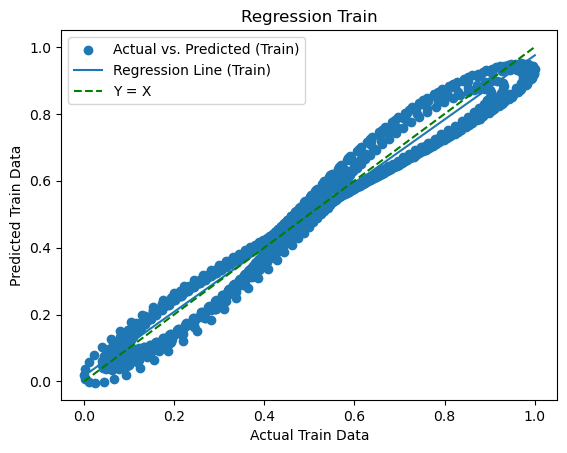

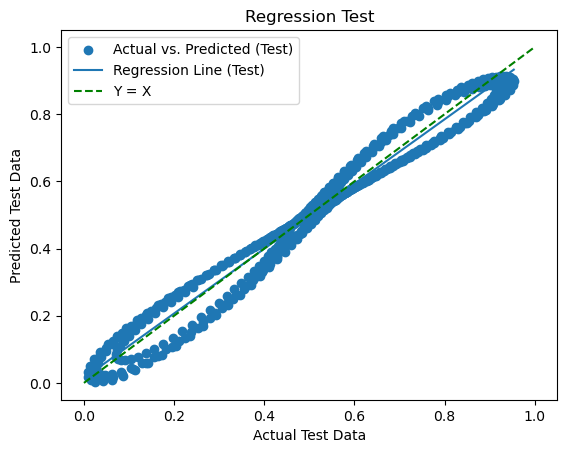

In [54]:
for t in range(epoch):
    error = np.zeros(num_train)
    #FeedForward
    for i in range(num_train):
        input_data = data[i, :5]
        net1u = np.dot(wxu, input_data.T) + np.dot(wc1u, o1p.reshape(n1,)) + o2p*wc2u.reshape(n1,)
        net1l = np.dot(wxl, input_data.T) + np.dot(wc1l, o1p.reshape(n1,)) + o2p*wc2l.reshape(n1,)
        o1u = np.maximum(sigmoid(net1u), sigmoid(net1l))
        o1l = np.minimum(sigmoid(net1u), sigmoid(net1l))
        o1 = 0.5*o1u + 0.5*o1l
        net2u = np.dot(wyu,o1.T)
        net2l = np.dot(wyl, o1.T)
        o2u = np.maximum(net2u, net2l)
        o2l = np.minimum(net2u, net2l)
        o2 = 0.5*o2u + 0.5*o2l
        target = data[i, 5]
        error[i] = target - o2

        #Back propagation 
        
        #updata layer 2: wyu and wyl
        #wyu
        gradwyu = -0.5*error[i]*o1
        wyu -= eta*gradwyu

        #wyl
        gradwyl = -0.5*error[i]*o1
        wyl -= eta*gradwyl
        
        #update layer 1: wxu, wxl, wc1u, wc1l, wc2u, wc2l
        #wxu
        gradwxu1 = -0.25*error[i]*np.dot((wyu*dfsigmoid(net1u)).T, input_data.reshape(1,n0))
        gradwxu2 =  -0.25*error[i]*np.dot((wyl*dfsigmoid(net1u)).T, input_data.reshape(1,n0))
        gradwxu  = gradwxu1 + gradwxu2
        wxu     -= eta*gradwxu
        
        #wxl
        gradwxl1 = -0.25*error[i]*np.dot((wyu*dfsigmoid(net1l)).T, input_data.reshape(1,n0)) 
        gradwxl2 = -0.25*error[i]*np.dot((wyl*dfsigmoid(net1l)).T, input_data.reshape(1,n0)) 
        gradwxl  = gradwxl1 + gradwxl2
        wxl     -= eta*gradwxl

        #wc1u
        gradwc1u1 = -0.25*error[i]*(wyu*dfsigmoid(net1u)).T*(o1p+0.5*np.dot(wc1u,dfsigmoid(net1up))*o1pp)
        gradwc1u2 = -0.25*error[i]*(wyl*dfsigmoid(net1u)).T*(o1p+0.5*np.dot(wc1u,dfsigmoid(net1up))*o1pp)
        gradwc1u  = gradwc1u1 + gradwc1u2
        wc1u     -= eta*gradwc1u


        #wc1l
        gradwc1l1 = -0.25*error[i]*(wyu*dfsigmoid(net1l)).T*(o1p+0.5*np.dot(wc1l,dfsigmoid(net1lp))*o1pp)
        gradwc1l2 =  -0.25*error[i]*(wyl*dfsigmoid(net1l)).T*(o1p+0.5*np.dot(wc1l,dfsigmoid(net1lp))*o1pp)
        gradwc1l = gradwc1l1 + gradwc1l2
        wc1l    -= eta*gradwc1l
        
        #wc2u
        gradwc2u1 = -0.25*error[i]*wyu*dfsigmoid(net1u)*(o2p + 0.25*np.dot(wyup,dfsigmoid(net1up))*o2pp + 0.25*np.dot(wylp,dfsigmoid(net1up))*o2pp)
        gradwc2u2 = -0.25*error[i]*wyl*dfsigmoid(net1u)*(o2p + 0.25*np.dot(wyup,dfsigmoid(net1up))*o2pp + 0.25*np.dot(wylp,dfsigmoid(net1up))*o2pp)
        gradwc2u = gradwc2u1 + gradwc2u2
        wc2u    -= eta*gradwc2u
        
        #wc2l
        gradwc2l1 = -0.25*error[i]*wyu*dfsigmoid(net1l)*(o2p + 0.25*np.dot(wyup,dfsigmoid(net1lp))*o2pp + 0.25*np.dot(wylp,dfsigmoid(net1lp))*o2pp)
        gradwc2l2 = -0.25*error[i]*wyl*dfsigmoid(net1l)*(o2p + 0.25*np.dot(wyup,dfsigmoid(net1lp))*o2pp + 0.25*np.dot(wylp,dfsigmoid(net1lp))*o2pp)
        gradwc2l = gradwc2l1 + gradwc2l2 
        wc2l    -= eta*gradwc2l 
        
        # step(k-2)
        o2pp = o2p
        o1pp = o1p
        
        # step(k-1)
        o1p = o1
        o2p = o2
        
        net1lp = net1l
        net1up = net1u
        
        wylp = wyl
        wyup = wyu

    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1u = np.dot(wxu, input_data.T) + np.dot(wc1u, o1p.reshape(n1,)) + o2p*wc2u.reshape(n1,)
        net1l = np.dot(wxl, input_data.T) + np.dot(wc1l, o1p.reshape(n1,)) + o2p*wc2l.reshape(n1,)
        o1u = np.maximum(sigmoid(net1u), sigmoid(net1l))
        o1l = np.minimum(sigmoid(net1u), sigmoid(net1l))
        o1 = 0.5*o1u + 0.5*o1l
        net2u = np.dot(wyu,o1.T)
        net2l = np.dot(wyl, o1.T)
        o2u = np.maximum(net2u, net2l)
        o2l = np.minimum(net2u, net2l)
        o2 = 0.5*o2u + 0.5*o2l
        output_data_train[i] = o2
        o1p = o1
        o2p = o2
        target = data[i, 5]
        error[i] = target - o2
        error_square_train[i] = 0.5*(error[i]) ** 2
    mse_train[t] = np.mean(error_square_train)


    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5]
        net1u = np.dot(wxu, input_data.T) + np.dot(wc1u, o1p.reshape(n1,)) + o2p*wc2u.reshape(n1,)
        net1l = np.dot(wxl, input_data.T) + np.dot(wc1l, o1p.reshape(n1,)) + o2p*wc2l.reshape(n1,)
        o1u = np.maximum(sigmoid(net1u), sigmoid(net1l))
        o1l = np.minimum(sigmoid(net1u), sigmoid(net1l))
        o1 = 0.5*o1u + 0.5*o1l
        net2u = np.dot(wyu,o1.T)
        net2l = np.dot(wyl, o1.T)
        o2u = np.maximum(net2u, net2l)
        o2l = np.minimum(net2u, net2l)
        o2 = 0.5*o2u + 0.5*o2l
        output_data_test[i] = o2
        o1p = o1
        o2p = o2
        target = data[num_train + i, 5]
        error[i] = target - o2
        error_square_test[i] = 0.5*(error[i]) ** 2
    mse_test[t] = np.mean(error_square_test)

    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()   
             

**Temperature**

In [1]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNTU/HW3/regression/Temperature Dataset.xlsx")
data_T = df.to_numpy()

**Preparing Dataset**

In [4]:
data = data_T
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display, clear_output

def createTimeSeries(data):
    tw = 8  #window
    l = data.shape[0] - tw -1
    time_series_array = np.zeros((l, tw-2))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
      for j in range(6):
        if j!=5:
          time_series_array[i, j] = data[i+j]
        elif j==5:
           time_series_array[i, j] = data[i+j+2]
    return  time_series_array


data = createTimeSeries(data)

def normalizeData(data):
  for ii in range(6):
      data[:, ii] = (data[:, ii] - np.min(data[:, ii])) / (np.max(data[:, ii]) - np.min(data[:, ii]))
  return data
data = normalizeData(data)


C:\Users\ISD\AppData\Local\Temp\ipykernel_15672\2469682676.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j]
C:\Users\ISD\AppData\Local\Temp\ipykernel_15672\2469682676.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j+2]


**Initialize Elman-Jordan Rough**

In [17]:
num_data      =  data.shape[0]
percent_train =  0.6
num_train     =  round(num_data * percent_train)
num_test      =  num_data - num_train
n0, n1, n2    =  5, 7, 1
eta           = 0.032
eta2          = 0.001
epoch         =  100

mse_train = np.zeros(epoch)
mse_test  = np.zeros(epoch)

a, c, b = -1,0,1


#layer 1 information
np.random.seed(42)
wxu  = np.random.uniform(c, b, (n1,n0))
wxl  = np.random.uniform(a, c, (n1,n0))

wc1u = np.random.uniform(c, b, (n1,n1))
wc1l = np.random.uniform(a, c, (n1,n1))

wc2u = np.random.uniform(c, b, (n2,n1))
wc2l = np.random.uniform(a, c, (n2,n1))

net1up = net1u = np.zeros(n1)
net1lp = net1l = np.zeros(n1)

o1u = np.zeros(n1)
o1l = np.zeros(n1)
o1pp = o1p = o1= np.zeros(n1)


#layer 2 information
wyup  = wyu = np.random.uniform(c, b, (n2, n1))
wylp  = wyl = np.random.uniform(a, c, (n2, n1))
net2u = np.zeros(n2)
net2l = np.zeros(n2)
o2u   = np.zeros(n2)
o2l   = np.zeros(n2)
o2pp  = o2p = o2= np.zeros(n2)

def sigmoid(x):
    return (1-np.exp(-x))/(1+np.exp(-x))

def dfsigmoid(x):
    return 2*np.exp(-x)/(1+np.exp(-x))**2
    

**Impelemention Elman-Joradn Rough**

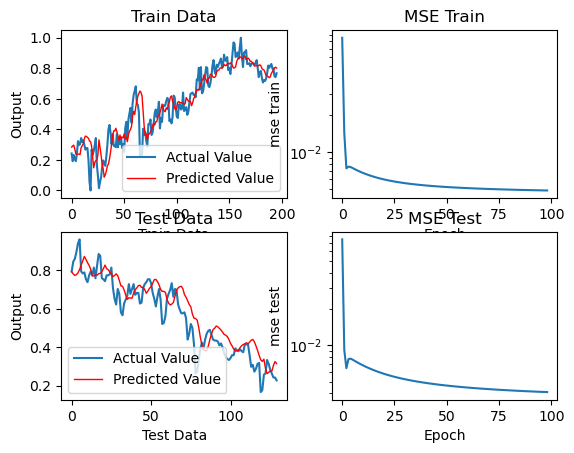

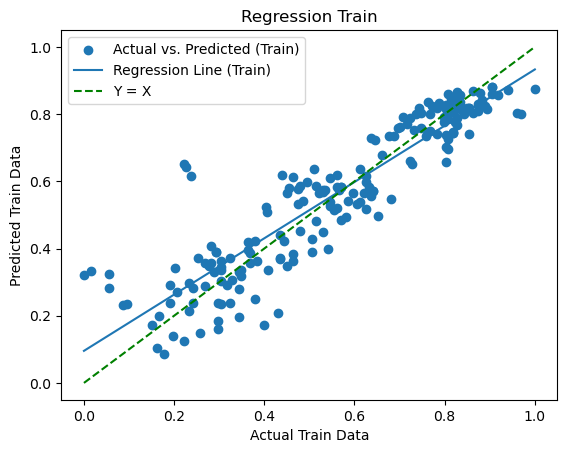

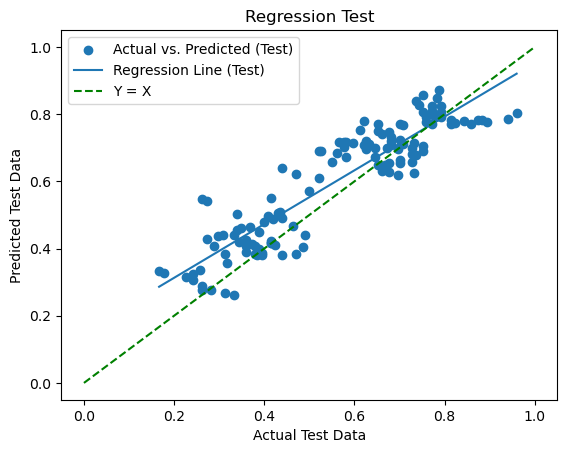

In [20]:
for t in range(epoch):
    error = np.zeros(num_train)
    #FeedForward
    for i in range(num_train):
        input_data = data[i, :5]
        net1u = np.dot(wxu, input_data.T) + np.dot(wc1u, o1p.reshape(n1,)) + o2p*wc2u.reshape(n1,)
        net1l = np.dot(wxl, input_data.T) + np.dot(wc1l, o1p.reshape(n1,)) + o2p*wc2l.reshape(n1,)
        o1u = np.maximum(sigmoid(net1u), sigmoid(net1l))
        o1l = np.minimum(sigmoid(net1u), sigmoid(net1l))
        o1 = 0.5*o1u + 0.5*o1l
        net2u = np.dot(wyu,o1.T)
        net2l = np.dot(wyl, o1.T)
        o2u = np.maximum(net2u, net2l)
        o2l = np.minimum(net2u, net2l)
        o2 = 0.5*o2u + 0.5*o2l
        target = data[i, 5]
        error[i] = target - o2

        #Back propagation 
        
        #updata layer 2: wyu and wyl
        #wyu
        gradwyu = -0.5*error[i]*o1
        wyu -= eta*gradwyu

        #wyl
        gradwyl = -0.5*error[i]*o1
        wyl -= eta*gradwyl
        
        #update layer 1: wxu, wxl, wc1u, wc1l, wc2u, wc2l
        #wxu
        gradwxu1 = -0.25*error[i]*np.dot((wyu*dfsigmoid(net1u)).T, input_data.reshape(1,n0))
        gradwxu2 =  -0.25*error[i]*np.dot((wyl*dfsigmoid(net1u)).T, input_data.reshape(1,n0))
        gradwxu  = gradwxu1 + gradwxu2
        wxu     -= eta*gradwxu
        
        #wxl
        gradwxl1 = -0.25*error[i]*np.dot((wyu*dfsigmoid(net1l)).T, input_data.reshape(1,n0)) 
        gradwxl2 = -0.25*error[i]*np.dot((wyl*dfsigmoid(net1l)).T, input_data.reshape(1,n0)) 
        gradwxl  = gradwxl1 + gradwxl2
        wxl     -= eta*gradwxl

        #wc1u
        gradwc1u1 = -0.25*error[i]*(wyu*dfsigmoid(net1u)).T*(o1p+0.5*np.dot(wc1u,dfsigmoid(net1up))*o1pp)
        gradwc1u2 = -0.25*error[i]*(wyl*dfsigmoid(net1u)).T*(o1p+0.5*np.dot(wc1u,dfsigmoid(net1up))*o1pp)
        gradwc1u  = gradwc1u1 + gradwc1u2
        wc1u     -= eta*gradwc1u


        #wc1l
        gradwc1l1 = -0.25*error[i]*(wyu*dfsigmoid(net1l)).T*(o1p+0.5*np.dot(wc1l,dfsigmoid(net1lp))*o1pp)
        gradwc1l2 =  -0.25*error[i]*(wyl*dfsigmoid(net1l)).T*(o1p+0.5*np.dot(wc1l,dfsigmoid(net1lp))*o1pp)
        gradwc1l = gradwc1l1 + gradwc1l2
        wc1l    -= eta*gradwc1l
        
        #wc2u
        gradwc2u1 = -0.25*error[i]*wyu*dfsigmoid(net1u)*(o2p + 0.25*np.dot(wyup,dfsigmoid(net1up))*o2pp + 0.25*np.dot(wylp,dfsigmoid(net1up))*o2pp)
        gradwc2u2 = -0.25*error[i]*wyl*dfsigmoid(net1u)*(o2p + 0.25*np.dot(wyup,dfsigmoid(net1up))*o2pp + 0.25*np.dot(wylp,dfsigmoid(net1up))*o2pp)
        gradwc2u = gradwc2u1 + gradwc2u2
        wc2u    -= eta*gradwc2u
        
        #wc2l
        gradwc2l1 = -0.25*error[i]*wyu*dfsigmoid(net1l)*(o2p + 0.25*np.dot(wyup,dfsigmoid(net1lp))*o2pp + 0.25*np.dot(wylp,dfsigmoid(net1lp))*o2pp)
        gradwc2l2 = -0.25*error[i]*wyl*dfsigmoid(net1l)*(o2p + 0.25*np.dot(wyup,dfsigmoid(net1lp))*o2pp + 0.25*np.dot(wylp,dfsigmoid(net1lp))*o2pp)
        gradwc2l = gradwc2l1 + gradwc2l2 
        wc2l    -= eta*gradwc2l 
        
        # step(k-2)
        o2pp = o2p
        o1pp = o1p
        
        # step(k-1)
        o1p = o1
        o2p = o2
        
        net1lp = net1l
        net1up = net1u
        
        wylp = wyl
        wyup = wyu

    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1u = np.dot(wxu, input_data.T) + np.dot(wc1u, o1p.reshape(n1,)) + o2p*wc2u.reshape(n1,)
        net1l = np.dot(wxl, input_data.T) + np.dot(wc1l, o1p.reshape(n1,)) + o2p*wc2l.reshape(n1,)
        o1u = np.maximum(sigmoid(net1u), sigmoid(net1l))
        o1l = np.minimum(sigmoid(net1u), sigmoid(net1l))
        o1 = 0.5*o1u + 0.5*o1l
        net2u = np.dot(wyu,o1.T)
        net2l = np.dot(wyl, o1.T)
        o2u = np.maximum(net2u, net2l)
        o2l = np.minimum(net2u, net2l)
        o2 = 0.5*o2u + 0.5*o2l
        output_data_train[i] = o2
        target = data[i, 5]
        o1p = o1
        o2p = o2
        error[i] = target - o2
        error_square_train[i] = 0.5*(error[i]) ** 2
    mse_train[t] = np.mean(error_square_train)


    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5]
        net1u = np.dot(wxu, input_data.T) + np.dot(wc1u, o1p.reshape(n1,)) + o2p*wc2u.reshape(n1,)
        net1l = np.dot(wxl, input_data.T) + np.dot(wc1l, o1p.reshape(n1,)) + o2p*wc2l.reshape(n1,)
        o1u = np.maximum(sigmoid(net1u), sigmoid(net1l))
        o1l = np.minimum(sigmoid(net1u), sigmoid(net1l))
        o1 = 0.5*o1u + 0.5*o1l
        net2u = np.dot(wyu,o1.T)
        net2l = np.dot(wyl, o1.T)
        o2u = np.maximum(net2u, net2l)
        o2l = np.minimum(net2u, net2l)
        o2 = 0.5*o2u + 0.5*o2l
        output_data_test[i] = o2
        target = data[num_train + i, 5]
        o1p = o1
        o2p = o2
        error[i] = target - o2
        error_square_test[i] = 0.5*(error[i]) ** 2
    mse_test[t] = np.mean(error_square_test)

    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()   
             